In [1]:
#Importamos las librerías que necesitaremos
from datetime import datetime
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display, HTML
#Inicialización de Plotly al colocar offline=true queda en loop
cf.set_config_file(sharing='public', theme='white', offline=True)

In [2]:
def datosCovid():
#Conexión a la API
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
    client = Socrata("healthdata.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
    results = client.get("g62h-syeh", limit=50000)

# Convert to pandas DataFrame
    return(pd.DataFrame.from_records(results))

In [3]:
#Consultamos las columnas

df_covid = datosCovid()
df_covid.columns.values

array(['state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used',
       'inpatient_beds_used_coverage', 'inpatient_beds_used_covid',
       'inpatient_beds_used_covid_coverage',
       'previous_day_admission_adult_covid_confirmed',
       'previous_day_admission_adult_covid_confirmed_coverage',
       'previous_day_admission_adult_covid_suspected',
       'previous_day_admission_adult_covid_suspected_coverage',
       'previous_day_admission_pediatric_covid_confirmed',
       'previous_day_admission_pediatric_covid_confirmed_coverage',
       'previo

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [5]:
ocupacion_estados = df_covid[['date','state', 'inpatient_beds','inpatient_beds_used','inpatient_beds_used_covid','previous_day_admission_adult_covid_confirmed','previous_day_admission_pediatric_covid_confirmed','hospital_onset_covid']]
ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
ocupacion_estados['inpatient_beds_used_covid'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used_covid'])
ocupacion_estados['previous_day_admission_adult_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_adult_covid_confirmed'])
ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'])
ocupacion_estados['hospital_onset_covid'] = pd.to_numeric(ocupacion_estados['hospital_onset_covid'])
ocupacion_estados['date'] = pd.to_datetime(ocupacion_estados['date'])

#filtramos la fecha requerida
ocupacion_estados_2020=ocupacion_estados.query("date >= '2020-01-01' and date <='2020-06-30'")
estados_max_ocup = ocupacion_estados_2020.sort_values(by=['inpatient_beds_used_covid'],ascending=False)
#filtro_estados_2020 = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid'].sum().sort_values(ascending=False)).head(5)
filtro_estados_2020 = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid','hospital_onset_covid'].sum().sort_values(by='inpatient_beds_used_covid', ascending=False)).head(5)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\1616108681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\1616108681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\161

In [6]:
filtro_estados_2020

,inpatient_beds_used_covid,hospital_onset_covid
state,,
NY,686528.0,5569.0
CA,434721.0,5499.0
FL,322227.0,6411.0
TX,246237.0,7703.0
IL,214010.0,1498.0


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

**Intervalos de crecimiento y decrecimiento

**Puntos críticos (mínimos y máximos)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\1479074007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\1479074007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\147

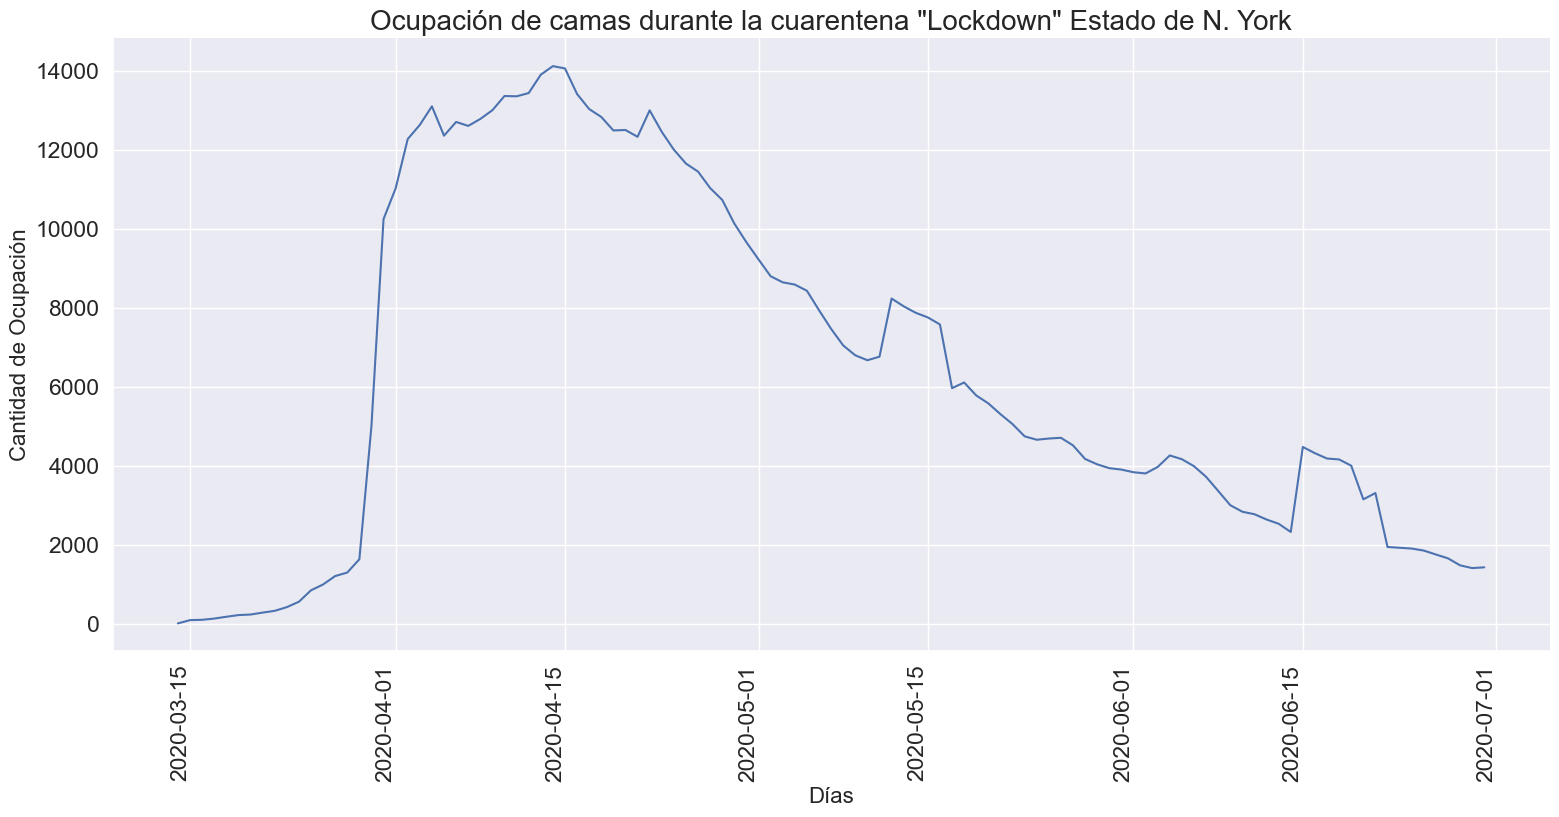

,date,inpatient_beds_used_covid
13341,2020-04-14,14126.0
11809,2020-04-15,14067.0
18723,2020-04-13,13909.0
16924,2020-04-12,13443.0
12527,2020-04-16,13419.0
...,...,...
15924,2020-03-18,174.0
21120,2020-03-17,128.0
17023,2020-03-16,97.0
7649,2020-03-15,88.0


In [8]:
ocupacion_estados = df_covid[['date','state', 'inpatient_beds','inpatient_beds_used','inpatient_beds_used_covid','previous_day_admission_adult_covid_confirmed','previous_day_admission_pediatric_covid_confirmed','hospital_onset_covid']]
ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
ocupacion_estados['inpatient_beds_used_covid'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used_covid'])
ocupacion_estados['previous_day_admission_adult_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_adult_covid_confirmed'])
ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'])
ocupacion_estados['hospital_onset_covid'] = pd.to_numeric(ocupacion_estados['hospital_onset_covid'])
ocupacion_estados['date'] = pd.to_datetime(ocupacion_estados['date'])
ocupacion_estados_2020=ocupacion_estados.query("date >= '2020-01-01' and date <='2020-06-30'")
filtroNY = ocupacion_estados_2020['state'] == 'NY'
OnlyNY = ocupacion_estados_2020[filtroNY]
y_NY = OnlyNY['inpatient_beds_used_covid']
x_NY = OnlyNY['date']
#sns.lineplot(y_NY,x_NY)
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=OnlyNY, y=y_NY,x=x_NY,
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Días', fontsize=16)
plt.ylabel('Cantidad de Ocupación', fontsize=16)
plt.title('Ocupación de camas durante la cuarentena "Lockdown" Estado de N. York', fontsize=20)
plt.show()
"Como se observa en el gráfico el punto máximo se encuentra en el día 14/04/2020"
"Desde ese punto comienza a decrecer"
#OnlyNY[['date','inpatient_beds_used_covid']]
Tabla2 = OnlyNY.sort_values('inpatient_beds_used_covid', ascending=False)
Tabla2[['date','inpatient_beds_used_covid']]

In [15]:
OnlyNY.iplot(kind='bar',x='date',y='inpatient_beds_used_covid', xTitle='Fecha',yTitle='Cantidad de Internaciones',title='Ocupación de camas durante la cuarentena "lockdown"')

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

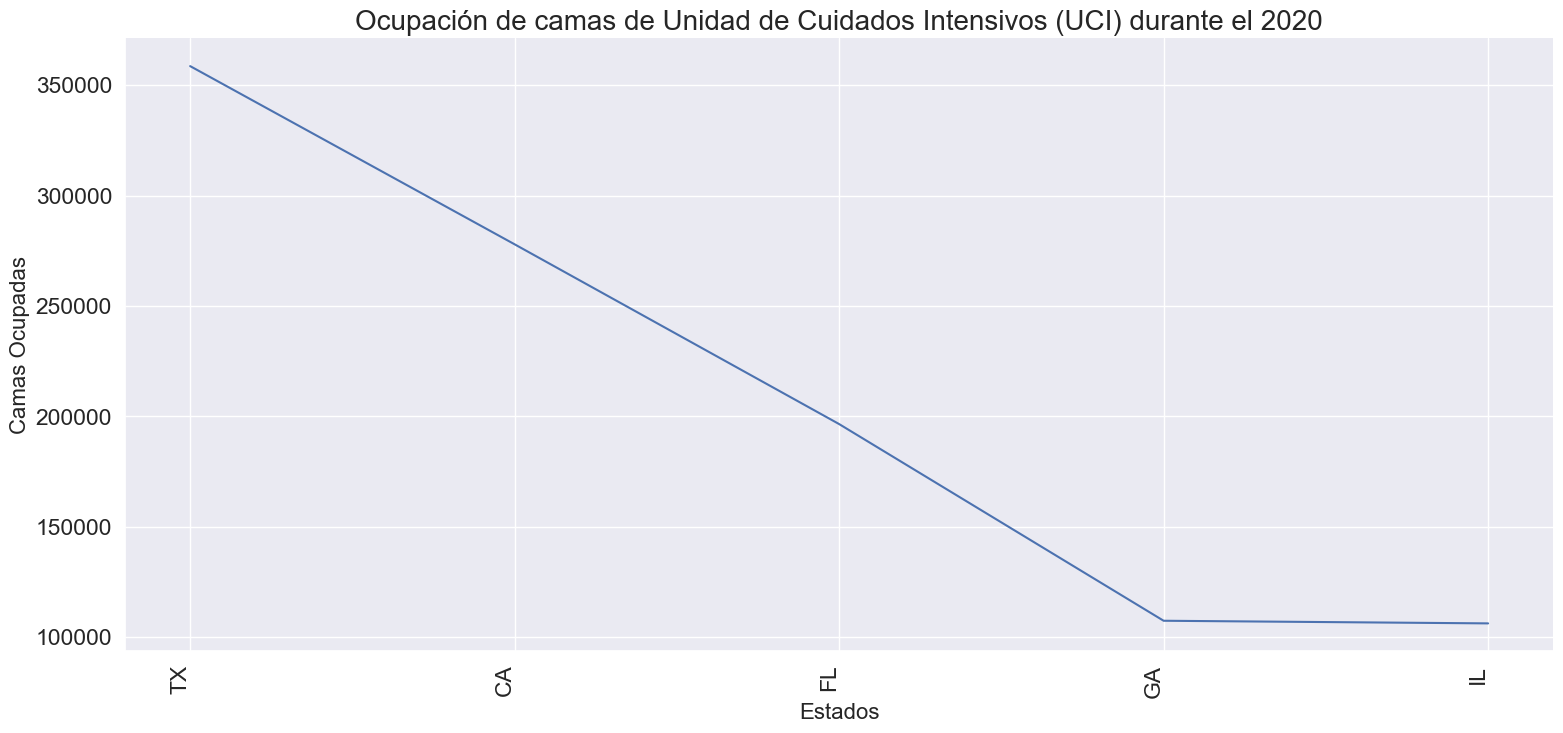

In [19]:
estados_icu_util = df_covid[['date','state', 'staffed_icu_adult_patients_confirmed_and_suspected_covid']]
estados_icu_util['date'] = pd.to_datetime(estados_icu_util['date'])
#estados_icu_util.head()
estados_icu_util['staffed_icu_adult_patients_confirmed_and_suspected_covid']= pd.to_numeric(estados_icu_util['staffed_icu_adult_patients_confirmed_and_suspected_covid'])
estados_icu_util_2020 = estados_icu_util.query("date >= '2020-01-01' and date <='2020-12-31'").groupby('state')['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum().sort_values(ascending=False).head(5)
#estados_icu_util_2020
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=estados_icu_util_2020,
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Estados', fontsize=16)
plt.ylabel('Camas Ocupadas', fontsize=16)
plt.title('Ocupación de camas de Unidad de Cuidados Intensivos (UCI) durante el 2020', fontsize=20)
plt.show();


In [20]:
estados_icu_util_2020

state
TX    358635.0
CA    277932.0
FL    196524.0
GA    107451.0
IL    106257.0
Name: staffed_icu_adult_patients_confirmed_and_suspected_covid, dtype: float64

4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

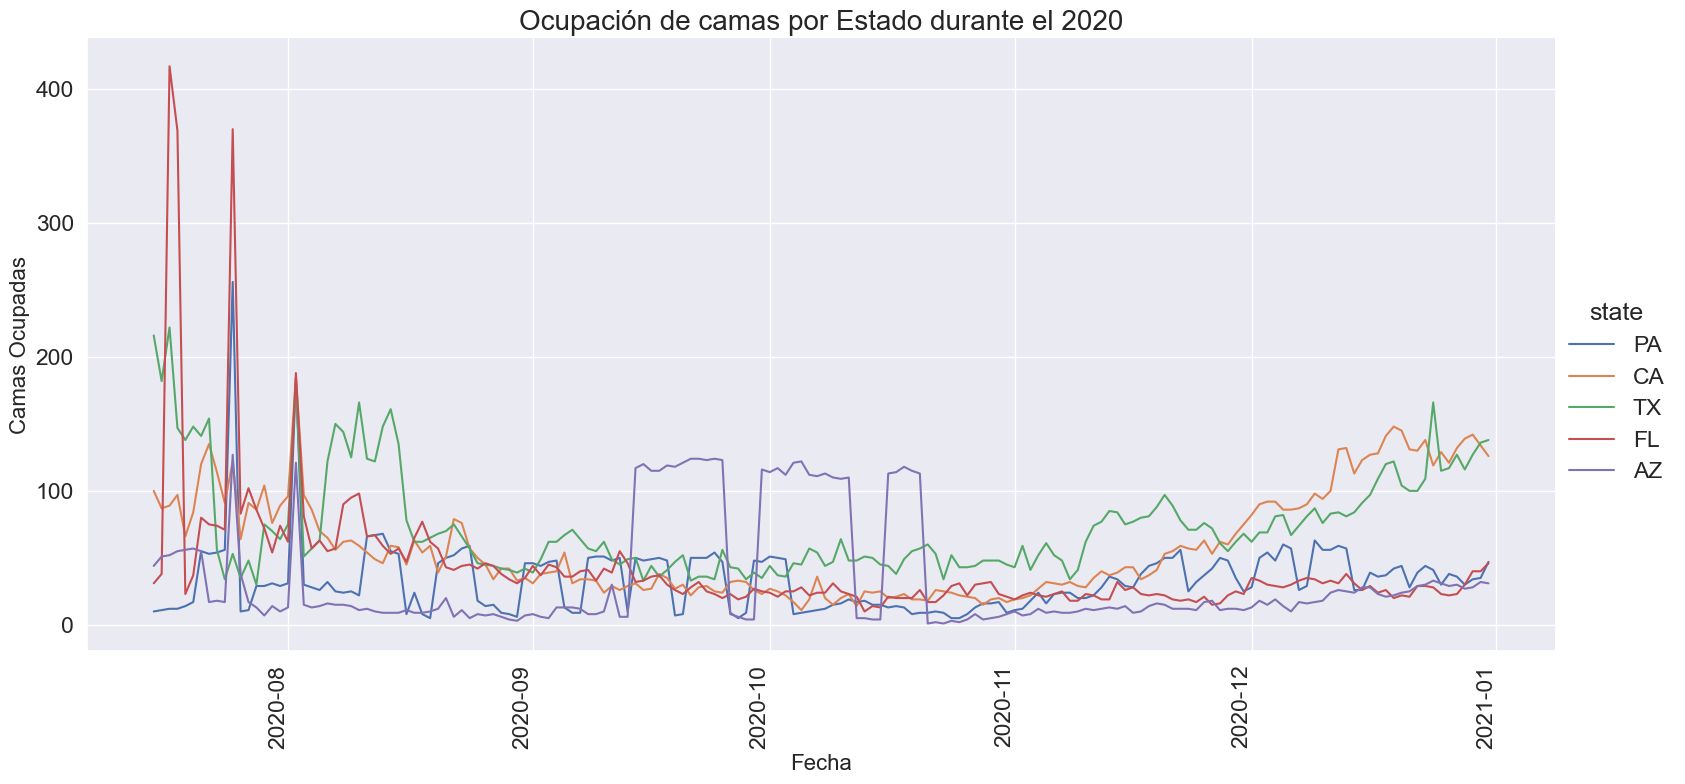

In [26]:
pedriatricos = df_covid[['date','state', 'total_pediatric_patients_hospitalized_confirmed_covid']]
pedriatricos['date'] = pd.to_datetime(pedriatricos['date'])
pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid']= pd.to_numeric(pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid'])
pediatricos_2020 = pedriatricos.query("date >= '2020-01-01' and date <='2020-12-31'")
tabla_pediatricos = pediatricos_2020.groupby('state')['total_pediatric_patients_hospitalized_confirmed_covid'].sum().sort_values(ascending=False).head(5)
tabla_pediatricos
mascara = pediatricos_2020[pediatricos_2020['state'].isin(tabla_pediatricos.index)]
#mascara
x_pedriatricos = mascara['date']
y_pediatricos = mascara['total_pediatric_patients_hospitalized_confirmed_covid']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=mascara, x=x_pedriatricos,y=y_pediatricos,
                        hue='state',
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Camas Ocupadas', fontsize=16)
plt.title('Ocupación de camas ICU pediatricas por Estado durante el 2020', fontsize=20)
plt.show();

In [27]:
mascara

,date,state,total_pediatric_patients_hospitalized_confirmed_covid
49,2020-06-13,PA,NaN
578,2020-07-29,CA,104.0
606,2020-08-11,CA,54.0
611,2020-10-15,PA,15.0
627,2020-12-17,TX,109.0
...,...,...,...
43282,2020-12-31,FL,46.0
44229,2020-12-29,FL,40.0
44297,2020-12-30,TX,136.0
46001,2020-12-31,AZ,31.0


In [28]:
mascara.iplot(kind='bar',x='date',y='total_pediatric_patients_hospitalized_confirmed_covid' ,xTitle='Fecha',yTitle='Camas Ocupadas',title='Ocupación de camas ICU pediatricas por Estado durante el 2020')

5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [36]:
icu_ocupacion = df_covid[['date','state', 'total_staffed_adult_icu_beds','staffed_icu_adult_patients_confirmed_covid','total_staffed_pediatric_icu_beds','staffed_icu_pediatric_patients_confirmed_covid']]


icu_ocupacion['total_staffed_adult_icu_beds'] = pd.to_numeric(icu_ocupacion['total_staffed_adult_icu_beds'])
icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'] = pd.to_numeric(icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'])
icu_ocupacion['total_staffed_pediatric_icu_beds'] = pd.to_numeric(icu_ocupacion['total_staffed_pediatric_icu_beds'])
icu_ocupacion['staffed_icu_pediatric_patients_confirmed_covid'] = pd.to_numeric(icu_ocupacion['staffed_icu_pediatric_patients_confirmed_covid'])
icu_ocupacion['date'] = pd.to_datetime(icu_ocupacion['date'])

icu_ocupacion_2020 = icu_ocupacion.query("date >= '2020-01-01' and date <='2020-12-31'")
print('En esta ocasion se encontró valores **NULOS**')
icu_ocupacion_2020.isnull().sum()
#icu_ocupacion_2020.fillna(0,inplace=True)
icu_ocupacion_2020['%_camas_ICU_Adultos'] = icu_ocupacion_2020['staffed_icu_adult_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_adult_icu_beds']
icu_ocupacion_2020['%_camas_ICU_Pediatrico'] = icu_ocupacion_2020['staffed_icu_pediatric_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_pediatric_icu_beds']
#icu_ocupacion_2020.info()
#icu_ocupacion_2020.fillna(1)

#st.write(icu_ocupacion_2020.info())
#icu_ocupacion_2020.dropna(inplace=True)
#icu_ocupacion_2020
tabla_porcentajes = icu_ocupacion_2020.groupby('state')['%_camas_ICU_Adultos','%_camas_ICU_Pediatrico'].sum().sort_values(by='%_camas_ICU_Adultos' ,ascending=False)
tabla_porcentajes.fillna(0,inplace=True)
tabla_porcentajes


En esta ocasion se encontró valores **NULOS**


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7136\2846584075.py:22: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,%_camas_ICU_Adultos,%_camas_ICU_Pediatrico
state,,
NJ,69.692479,0.000000
MS,63.084093,0.722821
GA,52.448992,1.232781
TX,49.101414,0.501162
NV,48.734096,0.000000
OK,47.869252,1.361492
AZ,47.119104,0.000000
SD,46.735008,0.261787
AR,45.319420,1.080272


6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

state
CA    35108.0
TX    32889.0
FL    26004.0
NY    17620.0
AZ    16250.0
PA    13363.0
GA    12338.0
OH    12023.0
NC    10922.0
TN     9439.0
MI     9332.0
IL     7500.0
KY     7252.0
NJ     6889.0
VA     6479.0
SC     6434.0
AL     6390.0
MO     6285.0
IN     5846.0
PR     4516.0
NV     4412.0
OK     4180.0
MD     4025.0
WA     3847.0
WI     3665.0
MS     3664.0
MA     3631.0
LA     3624.0
AR     3582.0
CO     2835.0
CT     2725.0
WV     2507.0
KS     2469.0
OR     2412.0
MN     2377.0
NM     1898.0
IA     1876.0
ID     1529.0
NE     1220.0
MT     1172.0
RI      914.0
ME      704.0
UT      618.0
AK      614.0
SD      572.0
DE      562.0
DC      532.0
NH      520.0
WY      496.0
HI      445.0
ND      334.0
VT      131.0
VI       44.0
AS        0.0
Name: deaths_covid, dtype: float64


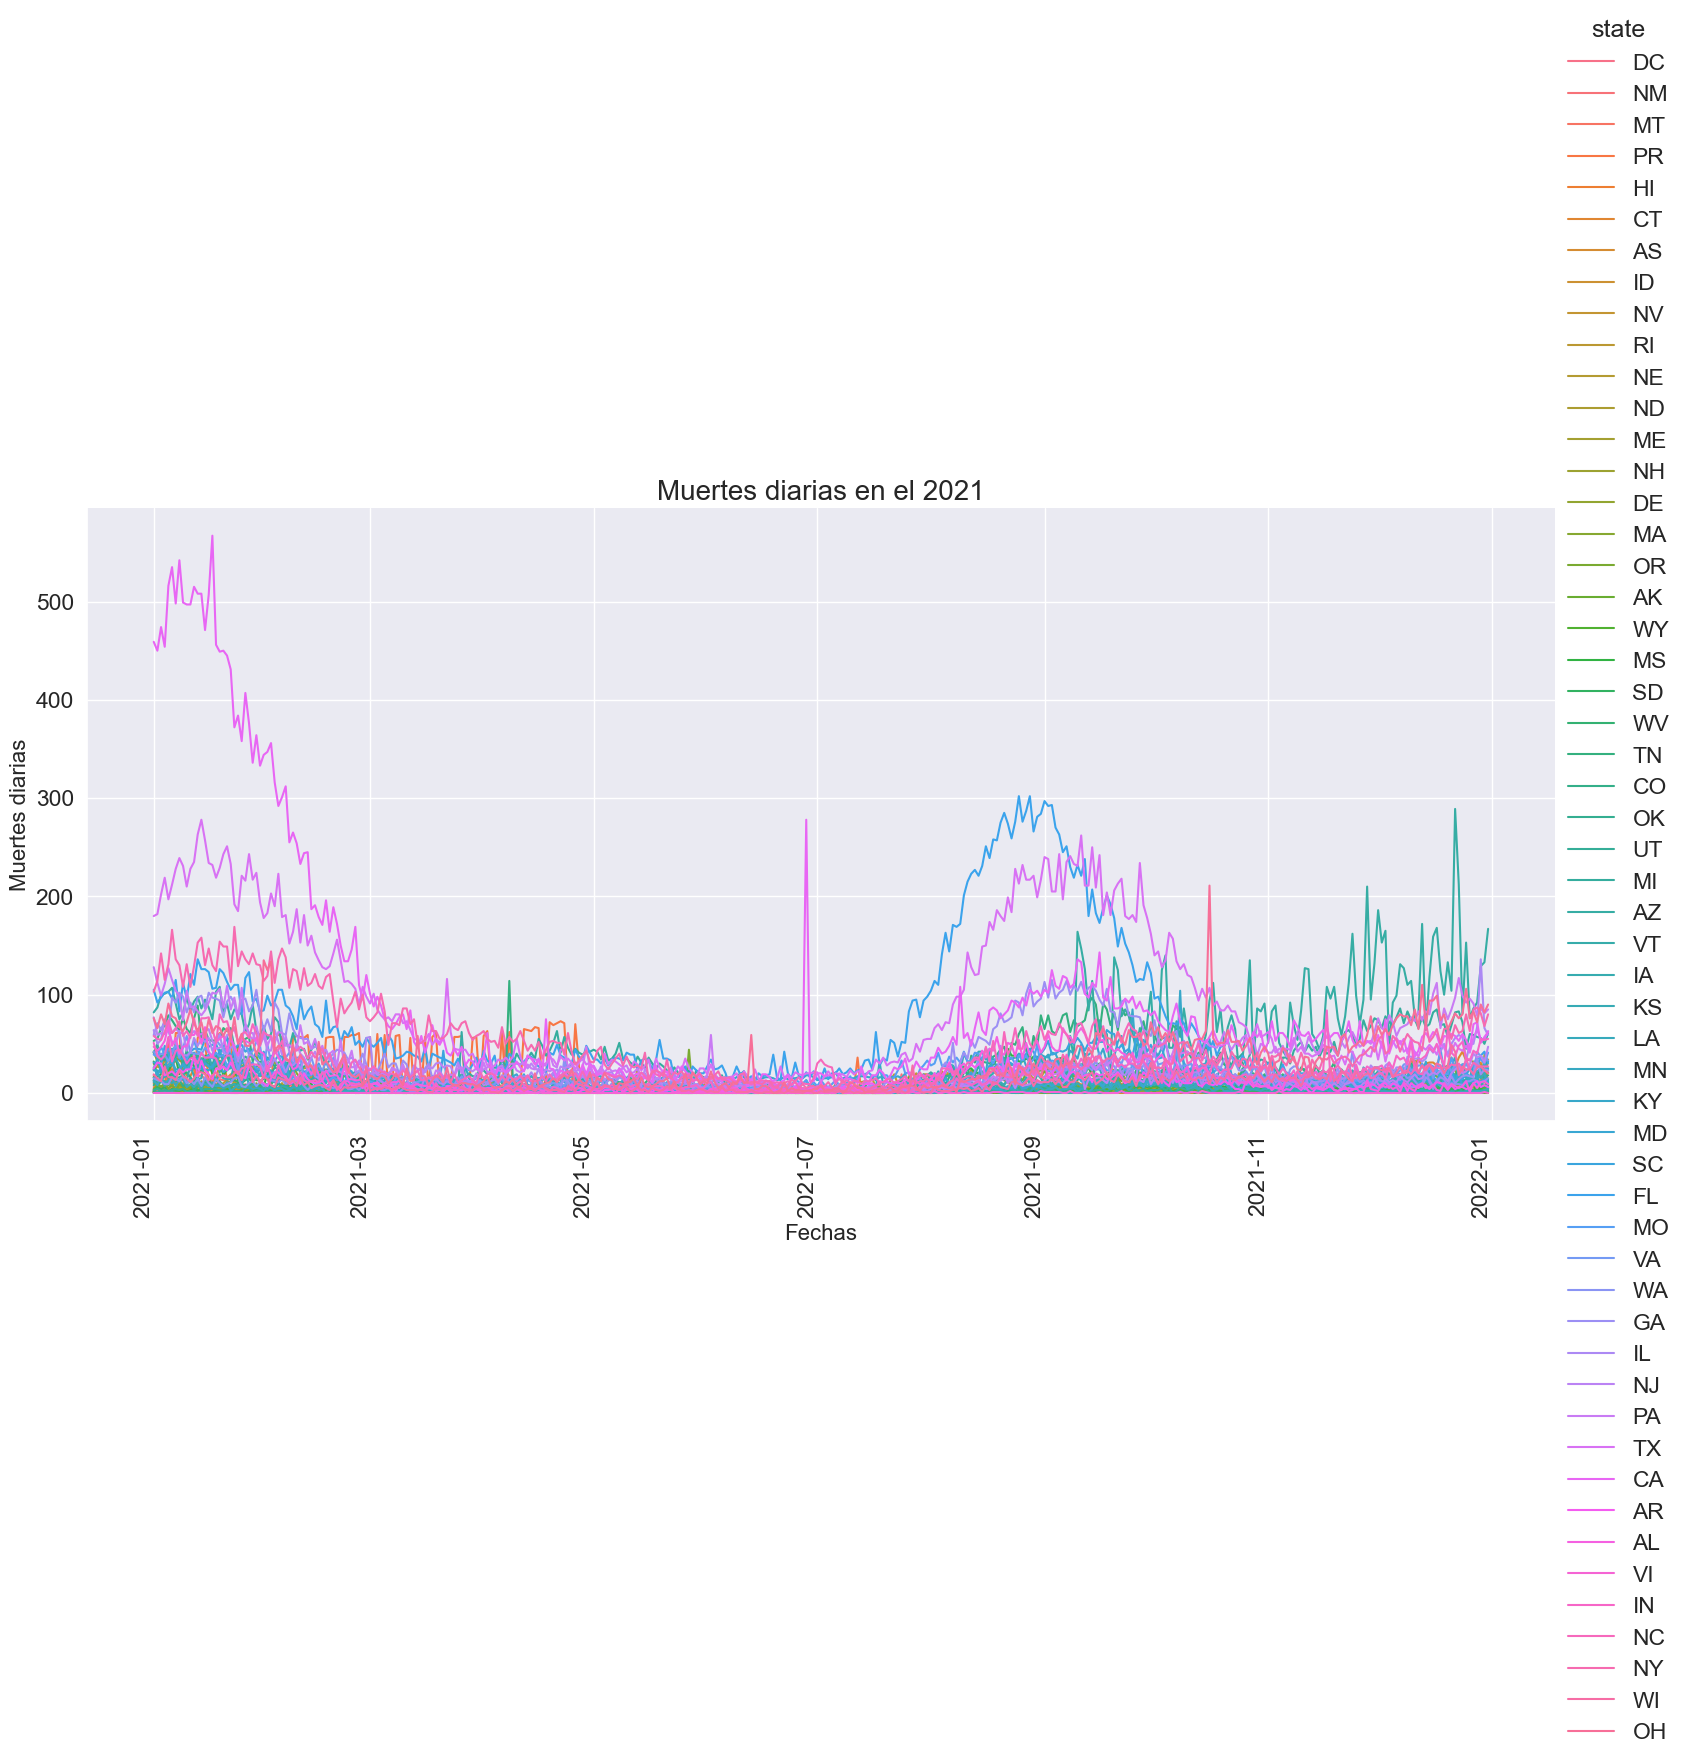

In [38]:
muertes = df_covid[['date','state','deaths_covid']]
muertes['deaths_covid'] = pd.to_numeric(muertes['deaths_covid'])
muertes['date'] = pd.to_datetime(muertes['date'])
muertes_2021 = muertes.query("date >= '2021-01-01' and date <='2021-12-31'")
tabla_muertes_2021 = muertes_2021.groupby('state')['deaths_covid'].sum().sort_values(ascending=False)
#tabla_grafico = muertes_2021.groupby('state')['date','deaths_covid'].sum().sort_values(by='date',ascending=False)
print(tabla_muertes_2021)
x_muertes_2021 = muertes_2021['date']
y_muertes_2021 = muertes_2021['deaths_covid']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=muertes_2021, x='date',y='deaths_covid',
                        hue='state',
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Fechas', fontsize=16)
plt.ylabel('Muertes diarias', fontsize=16)
plt.title('Muertes diarias en el 2021', fontsize=20)
plt.show();

7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

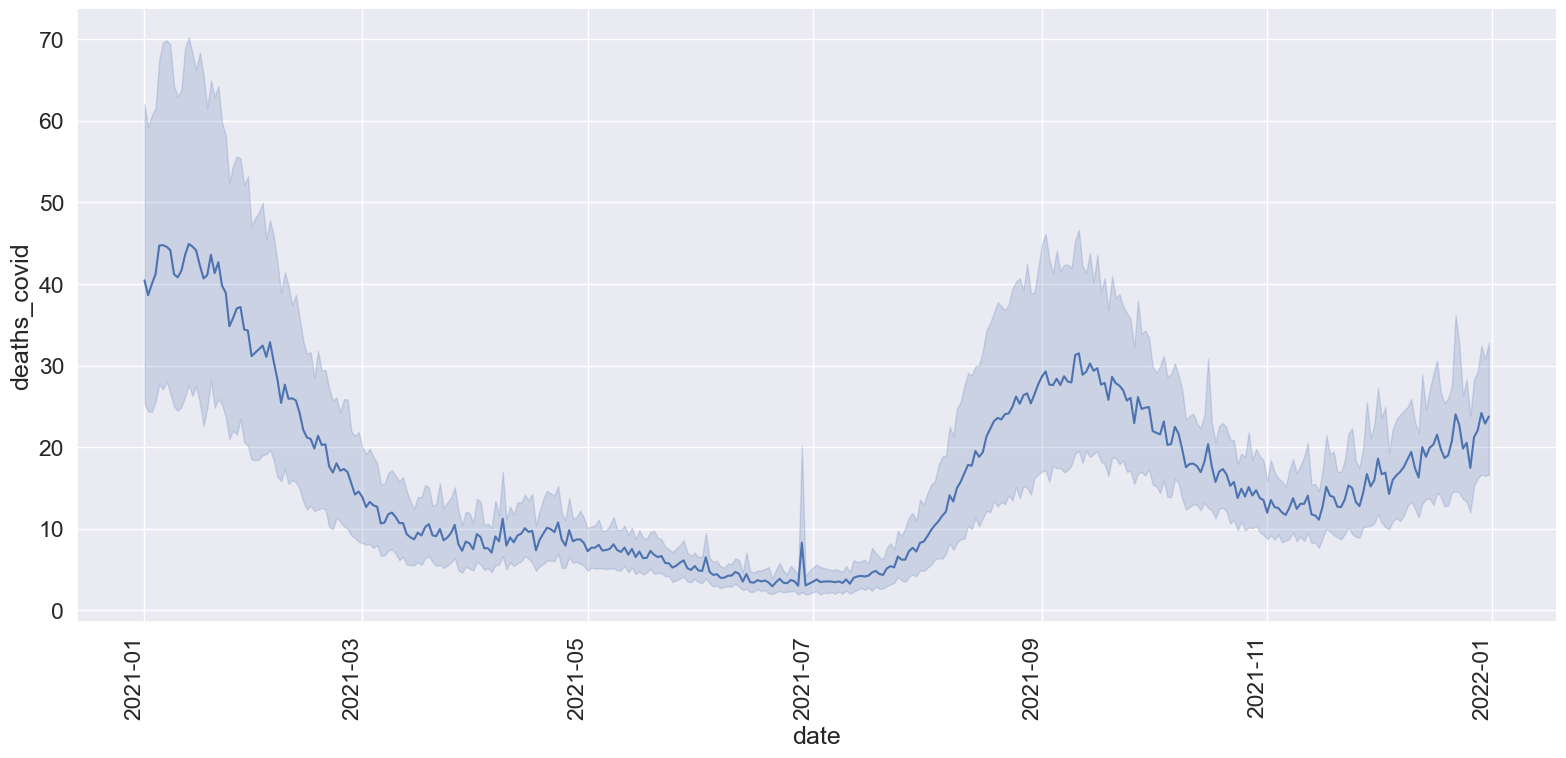

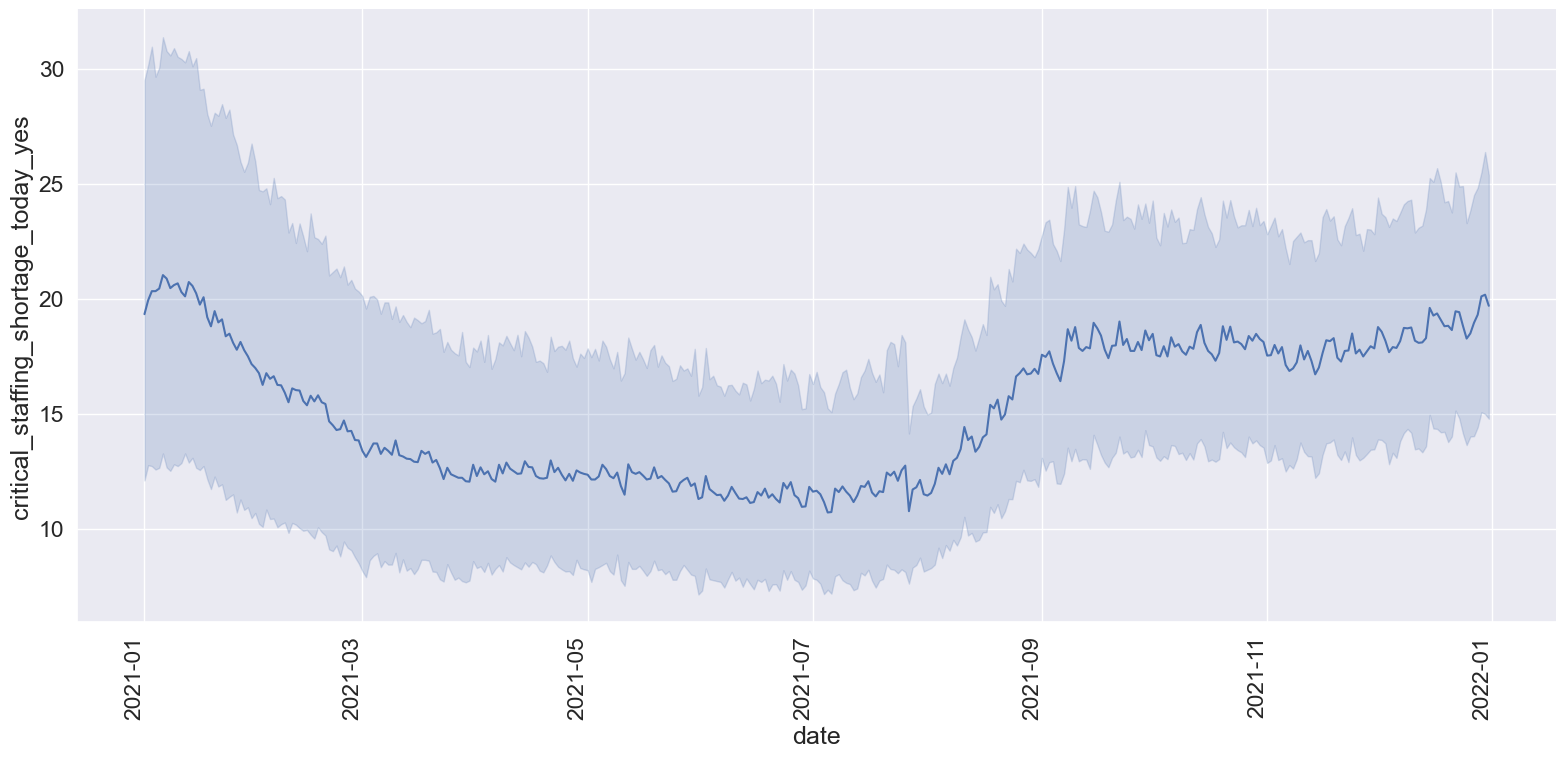

In [39]:
muertes = df_covid[['date','state','deaths_covid','critical_staffing_shortage_today_yes']]
muertes['deaths_covid'] = pd.to_numeric(muertes['deaths_covid'])
muertes['critical_staffing_shortage_today_yes'] = pd.to_numeric(muertes['critical_staffing_shortage_today_yes'])
muertes['date'] = pd.to_datetime(muertes['date'])
muertes_2021 = muertes.query("date >= '2021-01-01' and date <='2021-12-31'")
#muertes_2021
x_muertes_2021 = muertes_2021['date']
y_muertes_2021 = muertes_2021['deaths_covid']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gd2021 = sns.relplot(data=muertes_2021, x='date',y='deaths_covid',
                        #hue='state',
                        height= 8,
                        aspect=2, kind='line')
gs2021 = sns.relplot(data=muertes_2021, x='date',y='critical_staffing_shortage_today_yes',
                        #hue='state',
                        height= 8,
                        aspect=2, kind='line')
gd2021.figure.autofmt_xdate(rotation=90)
gs2021.figure.autofmt_xdate(rotation=90)
#plt.xlabel('Fecha', fontsize=16)
#plt.ylabel('Cantidad de Hospitales Sin recursos', fontsize=16)
#plt.title('Cantidad de Hospitales Colapsados', fontsize=20)
plt.show();


8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

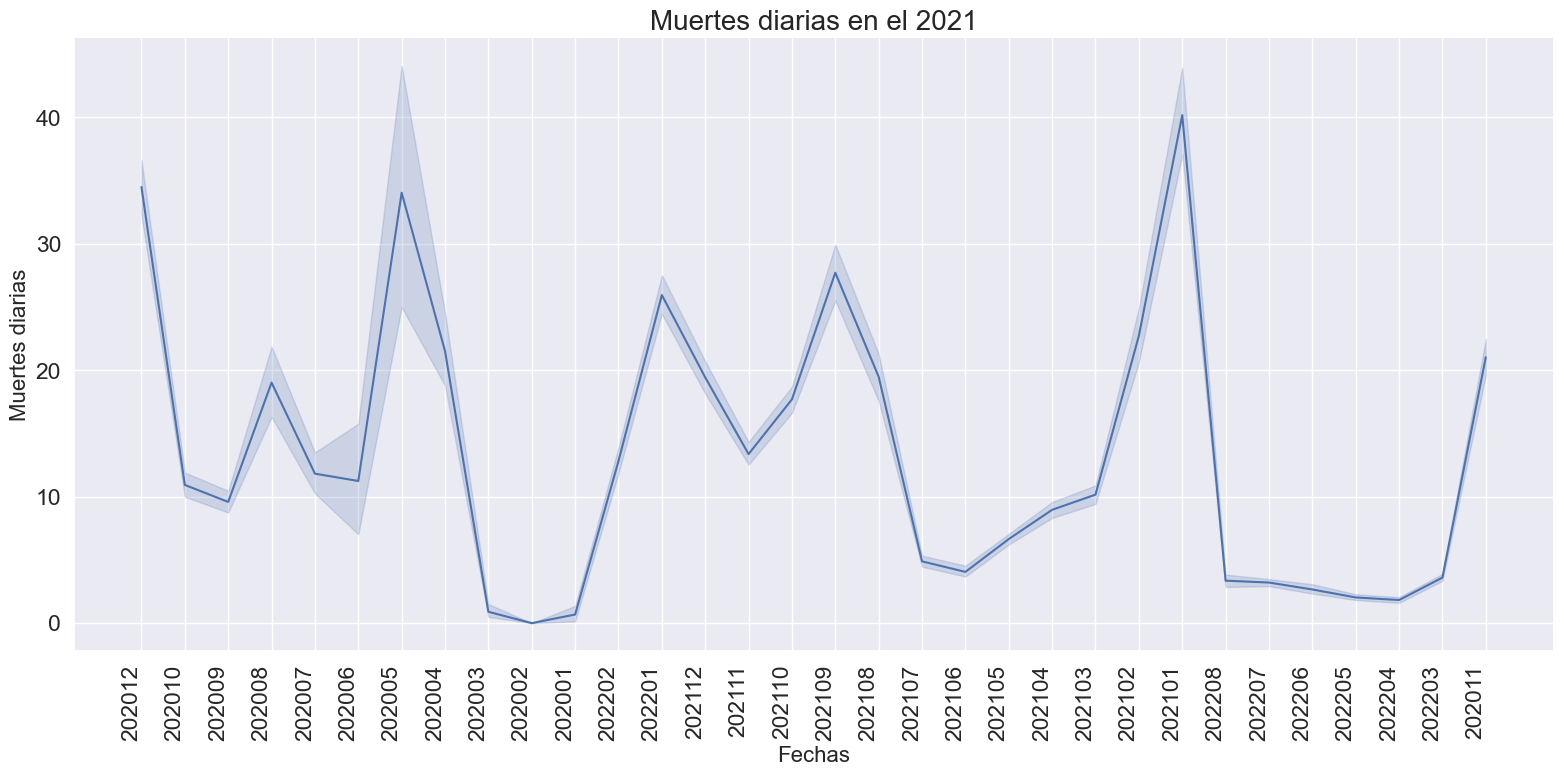

In [41]:
muertes = df_covid[['date','state','deaths_covid']]
muertes['deaths_covid'] = pd.to_numeric(muertes['deaths_covid'])
muertes['date'] = pd.to_datetime(muertes['date'])
muertes['MES'] = muertes['date'].dt.month
muertes['ANIO'] = muertes['date'].dt.year
muertes['AnioMes'] = muertes['ANIO'].apply(str) + muertes['MES'].apply(lambda x: f'{x:02d}')
#df_v1['SEMANA'] = df_v1['FECHA'].dt.week
#df_v1['ANIO'] = df_v1['FECHA'].dt.year
#df_v1['DIA'] = df_v1['FECHA'].dt.weekday
#df_v1['ANIOSEMANA'] = df_v1['ANIO'].apply(str) + df_v1['SEMANA'].apply(lambda x: f'{x:02d}')
#
#muertes_2021 = muertes.query("date >= '2021-01-01' and date <='2021-12-31'")
tabla_muertes_2021 = muertes.groupby('AnioMes')['deaths_covid'].sum().sort_values(ascending=False)
#tabla_grafico = muertes_2021.groupby('state')['date','deaths_covid'].sum().sort_values(by='date',ascending=False)
x_muertes_2021 = muertes['AnioMes']
y_muertes_2021 = muertes['deaths_covid']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=muertes, x='AnioMes',y='deaths_covid',
                        #hue='state',
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Fechas', fontsize=16)
plt.ylabel('Muertes diarias', fontsize=16)
plt.title('Muertes diarias en el 2021', fontsize=20)
plt.show();